# Compare Temperature Across Locations

Minimum and Maximum Temperature Comparison
* TMAX: The maximum temperature on a day between two locations
* TMIN: The minimum temperature on a day between two locations
* Boxenplot of daily TMAX or TMIN by month for one location

Mininum Temperature for Gardeners
* USDA Plant Hardiness Zones

The Ideal Temperature (Location)
* Based on TMAX

In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import functions

## Minimum and Maximum Temperature Comparison

In [2]:
# # Station 1 - Clatskanie
# df = pd.read_csv('../data/temperature_97016.csv')
# df = df[df['STATION']=='USC00351643']
# df = df.assign(year = pd.to_datetime(df['DATE']).dt.year)
# df = df.assign(month = pd.to_datetime(df['DATE']).dt.month)
# df1 = df[df['year']<2025]

# # Verify station 
# # functions.view_station_date_ranges(df)
# # geo_data = pd.read_csv('../data/geo_data.csv')
# # functions.map_stations(geo_data)

# assert len(df['STATION'].unique()) == 1

In [3]:
# Station 1 - Chicago
df = pd.read_csv('../data/temperature/temperature_chicago_ord.csv')
df = df.assign(year = pd.to_datetime(df['DATE']).dt.year)
df = df.assign(month = pd.to_datetime(df['DATE']).dt.month)
df1 = df[df['year']<2025]
assert len(df['STATION'].unique()) == 1

In [4]:
# Station 2 - Tampa
df = pd.read_csv('../data/temperature/temperature_tampa_tpa.csv')
df = df.assign(year = pd.to_datetime(df['DATE']).dt.year)
df = df.assign(month = pd.to_datetime(df['DATE']).dt.month)
df = df[df['year']<2025]
assert len(df['STATION'].unique()) == 1

df2 = df.copy()

In [5]:
# # Station 2 - Portland
# df = pd.read_csv('../data/temperature_97218.csv')
# df = df.assign(year = pd.to_datetime(df['DATE']).dt.year)
# df = df.assign(month = pd.to_datetime(df['DATE']).dt.month)
# df = df[df['year']<2025]
# assert len(df['STATION'].unique()) == 1

# df2 = df.copy()

In [6]:
# Merge the stations into one df
# df1_suffix = '_CLATSKANIE'
df1_suffix = '_ORD'
# df2_suffix = '_PDX'
df2_suffix = '_TPA'
df = df1.merge(df2,
                on=['DATE', 'year'],
                how='inner',
                suffixes=(df1_suffix, df2_suffix)
)

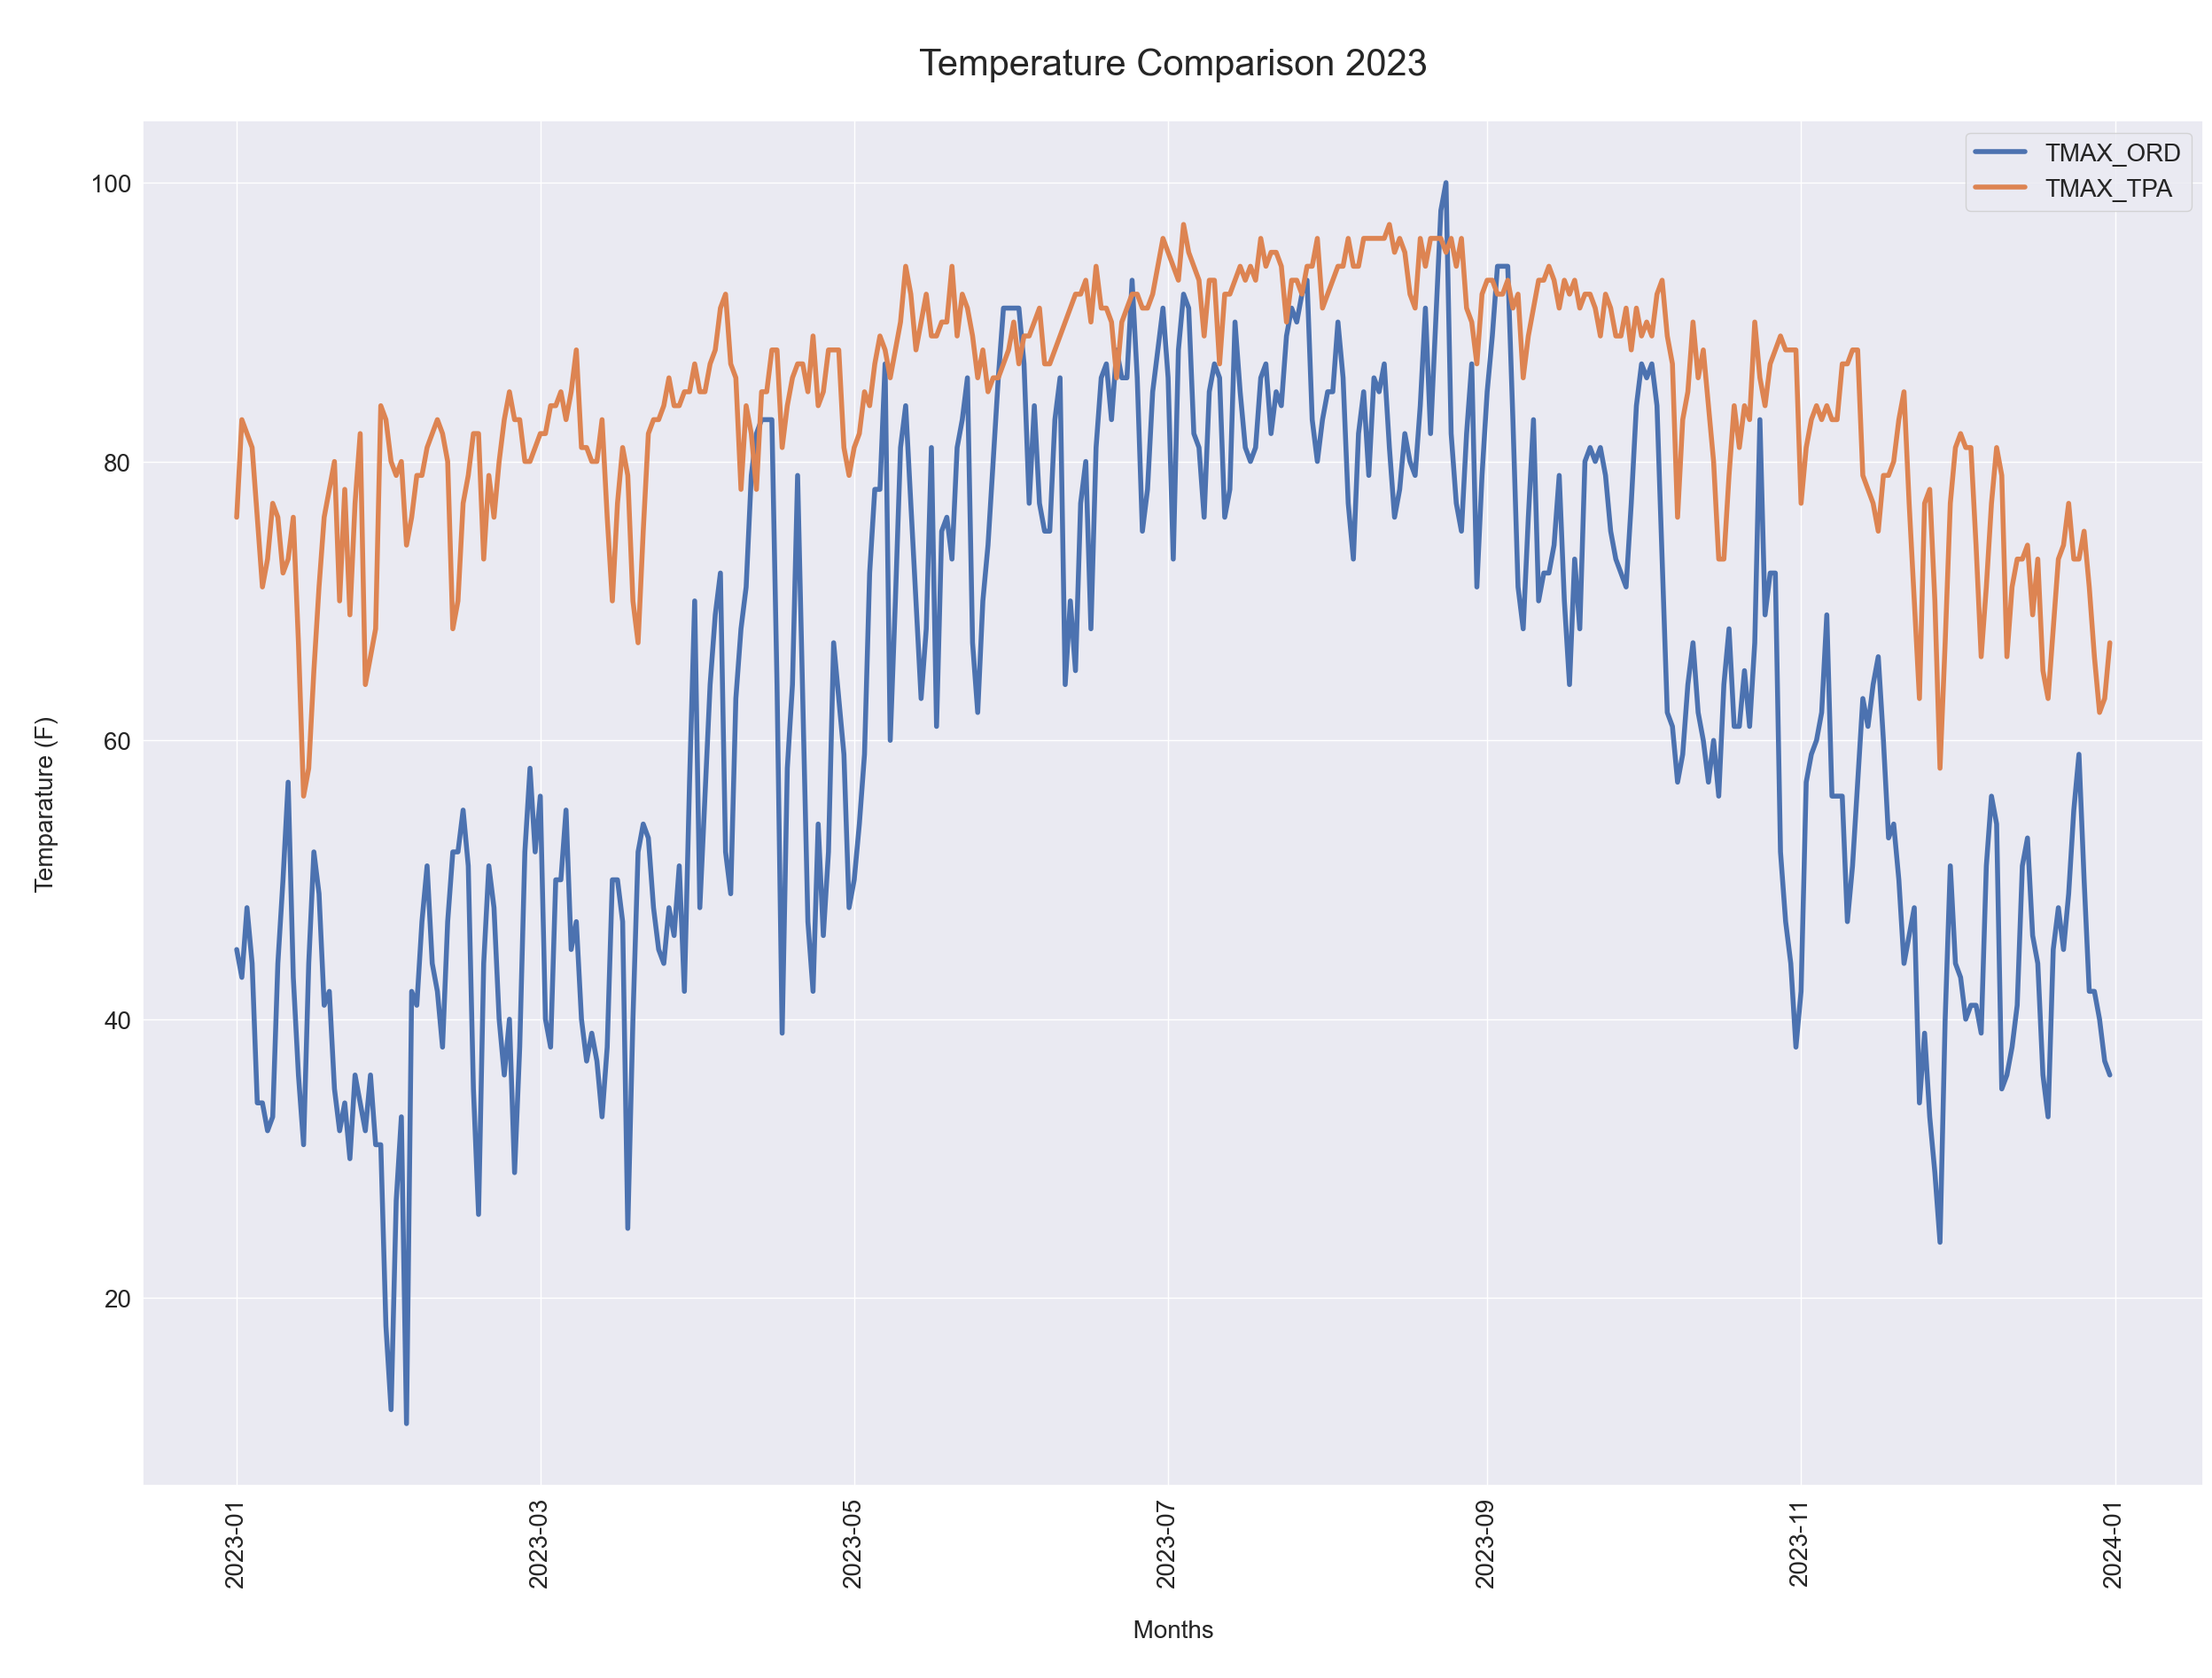

In [7]:
# Plot maximum temperature
pmax = functions.plot_temp_compare(df, 'TMAX', 2023)
# pmax.savefig('tmax_compare.jpg') 

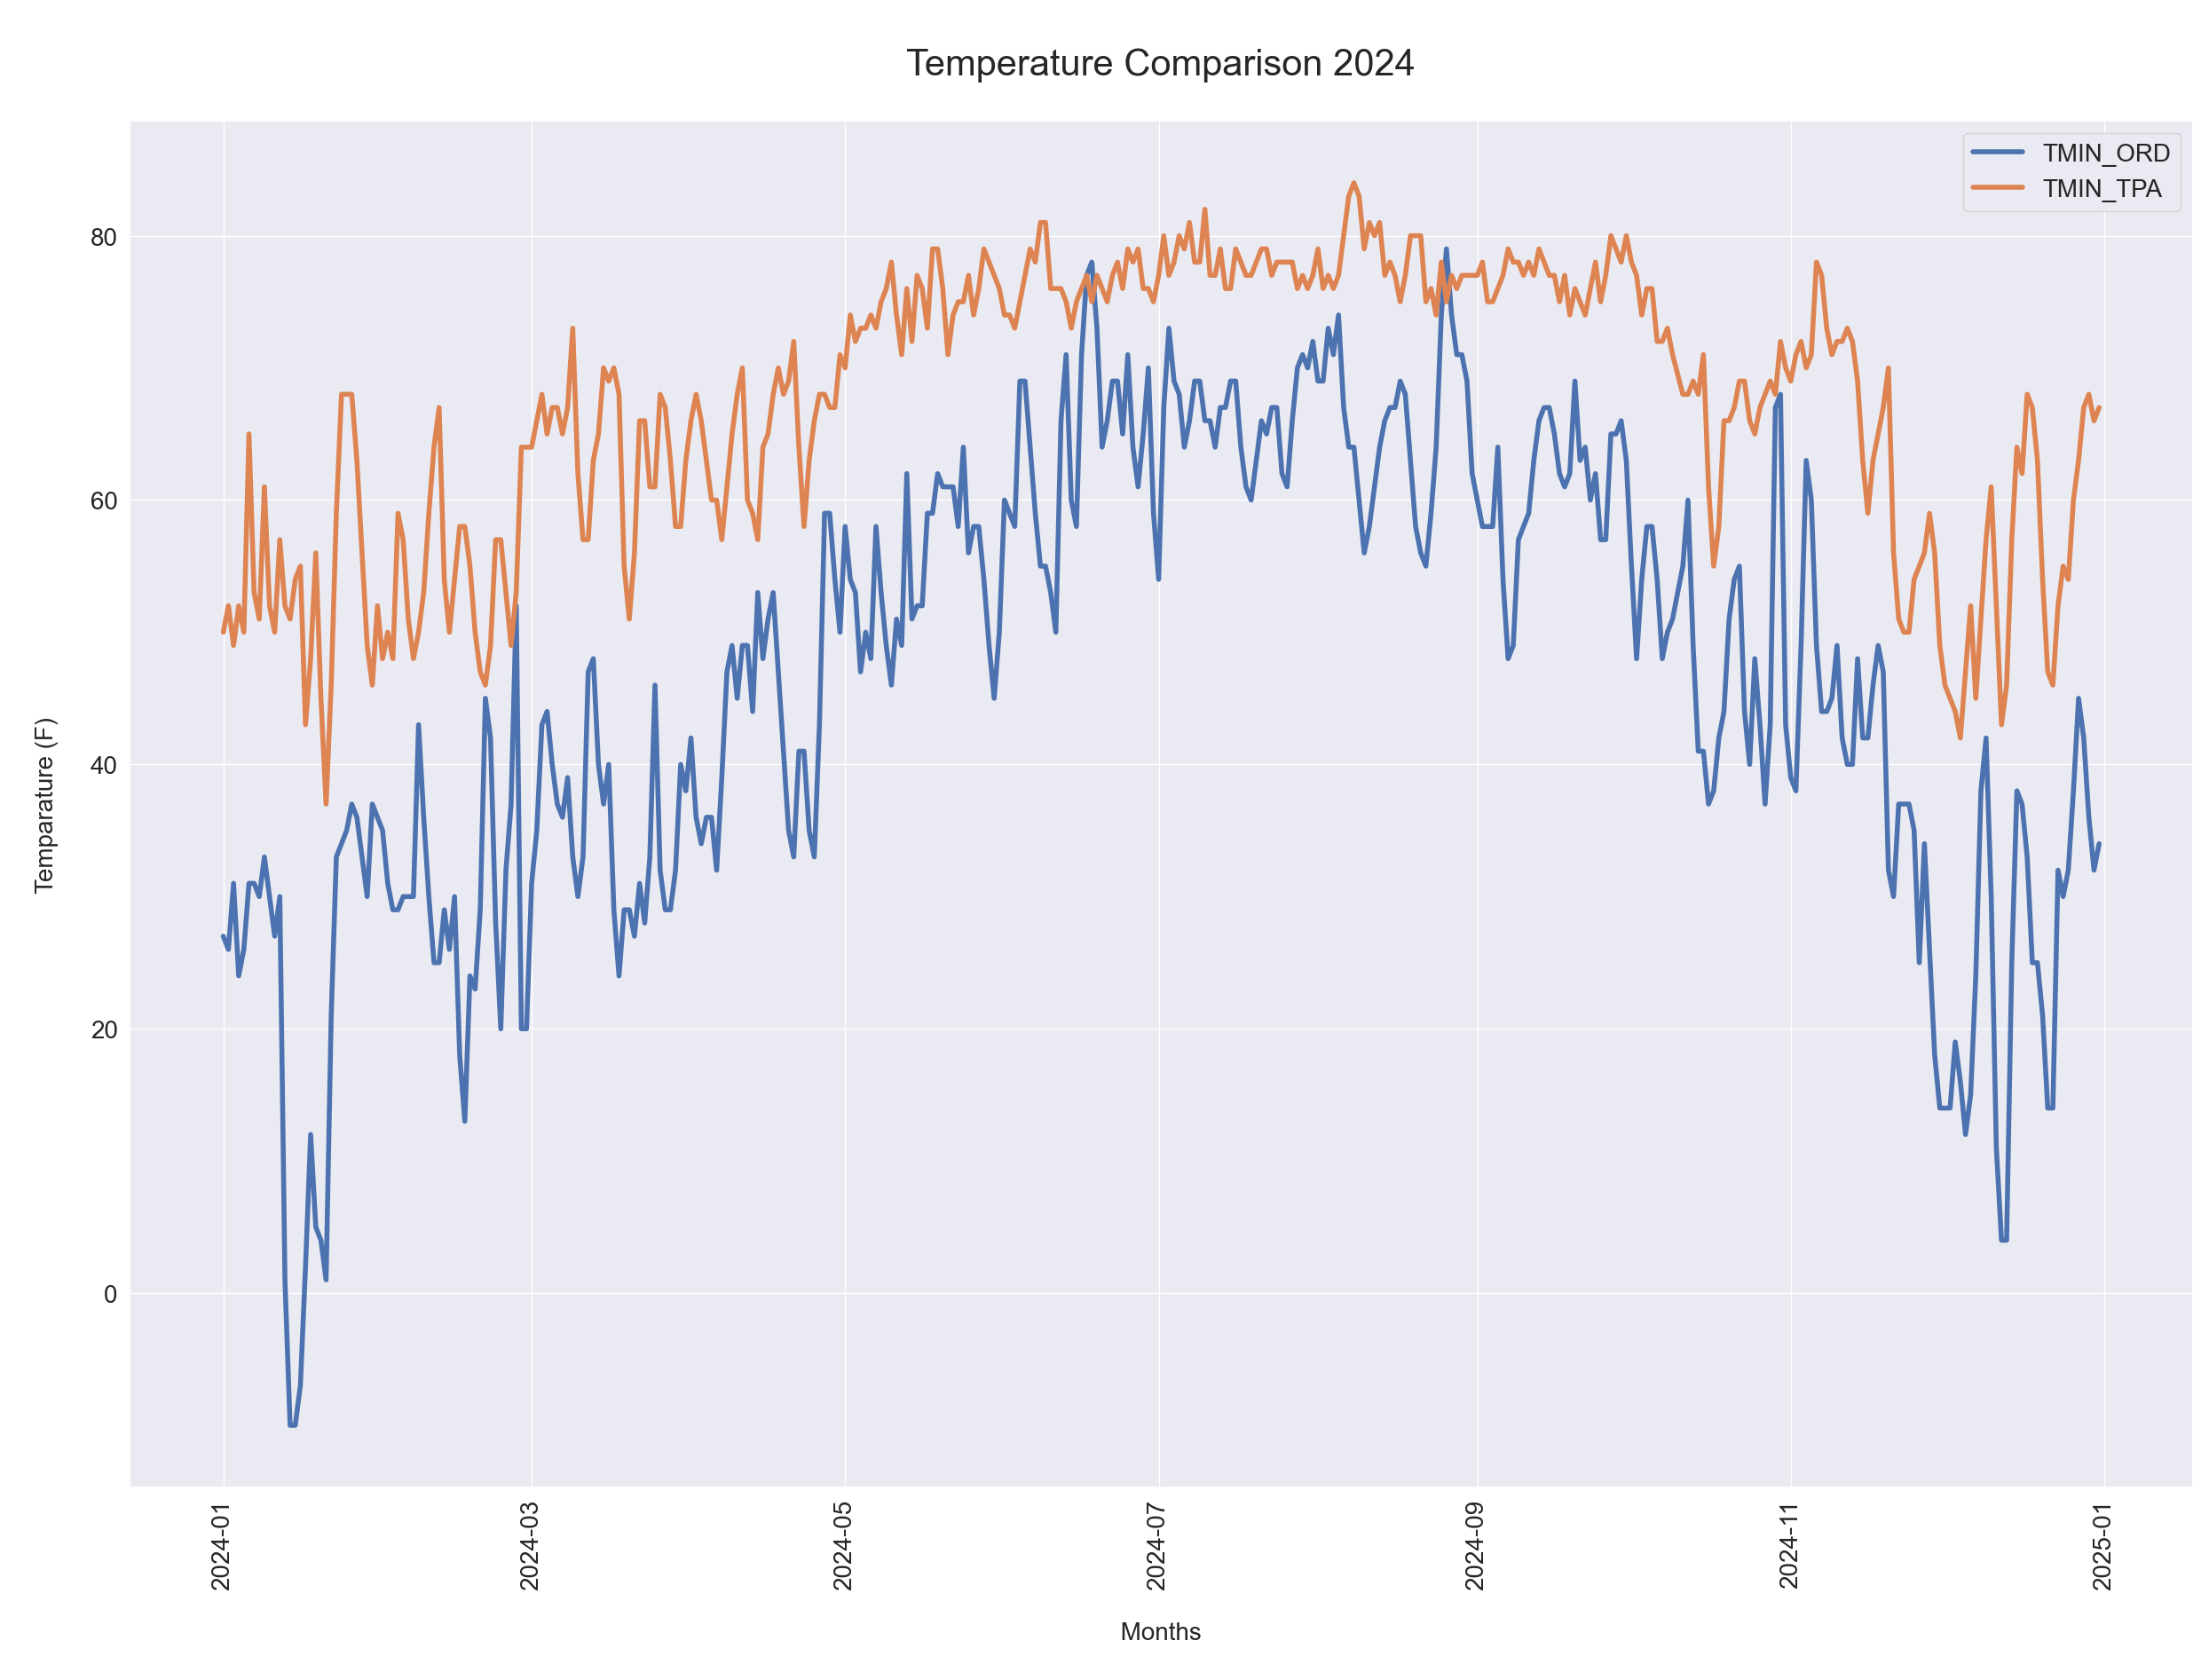

In [8]:
# Plot minimum temperature
pmin = functions.plot_temp_compare(df, 'TMIN', 2024)
# pmin.savefig('tmin_compare.jpg') 

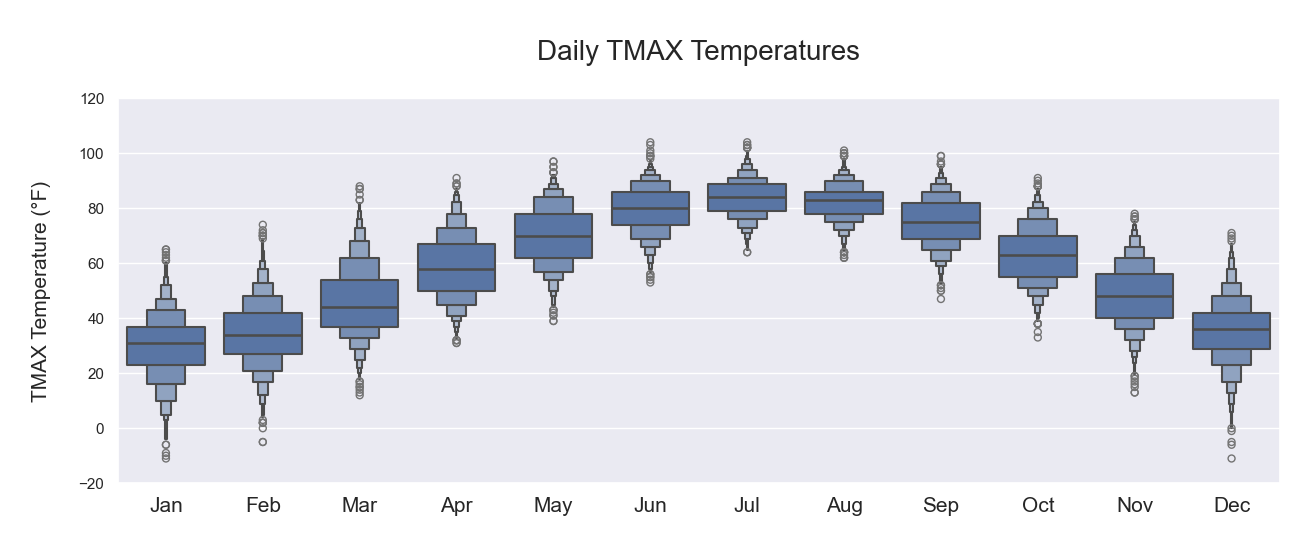

In [9]:
functions.plot_monthly_temp_plots(df1, metric='TMAX', ylim_low=-20, ylim_high=120)

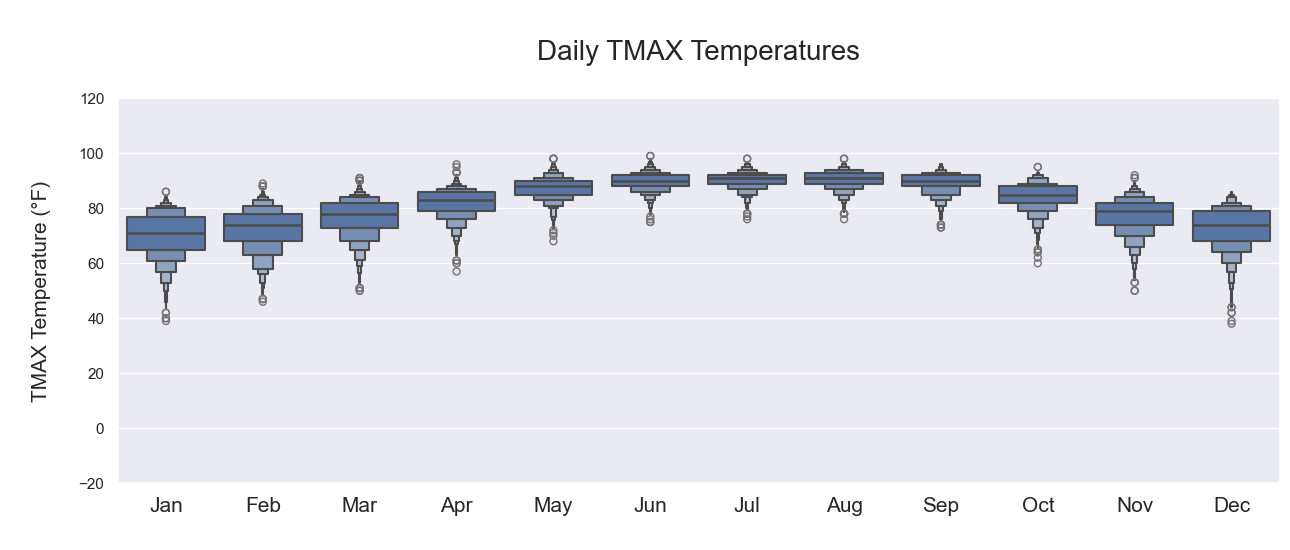

In [10]:
functions.plot_monthly_temp_plots(df2, metric='TMAX', ylim_low=-20, ylim_high=120)

## USDA Plant Hardiness Zones

A USDA hardiness zone is defined by the minimum annual temperature at a station, averaged over the last 30 years.  For example, by this metric:
* USDA Zone 8a falls within 10°F and 15°F
* USDA Zone 8b falls within 15°F and 20°F
* USDA Zone 9a falls within 20°F and 25°F


In [11]:
# Get Daily Minimum Temperature data
df = pd.read_csv('../data/temperature/temperature_97016.csv')
df = df.assign(year = pd.to_datetime(df['DATE']).dt.year)
df1 = df[df['STATION']=='USC00351643']

df2 = pd.read_csv('../data/temperature/temperature_chicago_ord.csv')
df2 = df2.assign(year = pd.to_datetime(df2['DATE']).dt.year)

df3 = pd.read_csv('../data/temperature/temperature_97218.csv')
df3 = df3.assign(year = pd.to_datetime(df3['DATE']).dt.year)

df4 = pd.read_csv('../data/temperature/temperature_tampa_tpa.csv')
df4 = df4.assign(year = pd.to_datetime(df4['DATE']).dt.year)

# Verify that there is only one station per df
assert len(df1.STATION.unique()) == 1
assert len(df2.STATION.unique()) == 1
assert len(df3.STATION.unique()) == 1
assert len(df4.STATION.unique()) == 1

# Merge the stations into one df
df = pd.concat([df1, df2, df3, df4])
df

,STATION,NAME,DATE,TAVG,TMAX,TMIN,year
25291,USC00351643,"CLATSKANIE, OR US",1935-05-01,NaN,60.0,40.0,1935
25292,USC00351643,"CLATSKANIE, OR US",1935-05-02,NaN,67.0,36.0,1935
25293,USC00351643,"CLATSKANIE, OR US",1935-05-03,NaN,75.0,40.0,1935
25294,USC00351643,"CLATSKANIE, OR US",1935-05-04,NaN,74.0,41.0,1935
25295,USC00351643,"CLATSKANIE, OR US",1935-05-05,NaN,61.0,49.0,1935
...,...,...,...,...,...,...,...
31042,USW00012842,"TAMPA INTERNATIONAL AIRPORT, FL US",2024-12-27,69.0,80.0,63.0,2024
31043,USW00012842,"TAMPA INTERNATIONAL AIRPORT, FL US",2024-12-28,72.0,79.0,67.0,2024
31044,USW00012842,"TAMPA INTERNATIONAL AIRPORT, FL US",2024-12-29,72.0,79.0,68.0,2024
31045,USW00012842,"TAMPA INTERNATIONAL AIRPORT, FL US",2024-12-30,70.0,77.0,66.0,2024


In [ ]:
# Get weather station location data 
df_stations = pd.read_csv('../data/geo_data.csv')
# df_stations = df_stations[df_stations['STATION'].isin(list(set(df1['STATION'].unique()).union(df2['STATION'].unique())))]
df_stations = df_stations[df_stations['STATION'].isin(df['STATION'].unique())]

# Map the stations 
# US
map_plot = functions.map_stations(df_stations,
                       default_lat=40,
                       default_long=-95,
                       default_zoom=4,)

# # Oregon
# functions.map_stations(df_stations,
#                        default_lat=45.7,
#                        default_long=-122.7,
#                        default_zoom=9,)

# The latest vscode update breaks the ability to display folium maps (even when trust settings are set), need to save it
path_save = "/Users/alberta/Desktop/"
map_plot.save(path_save + "stations_map.html")
map_plot 

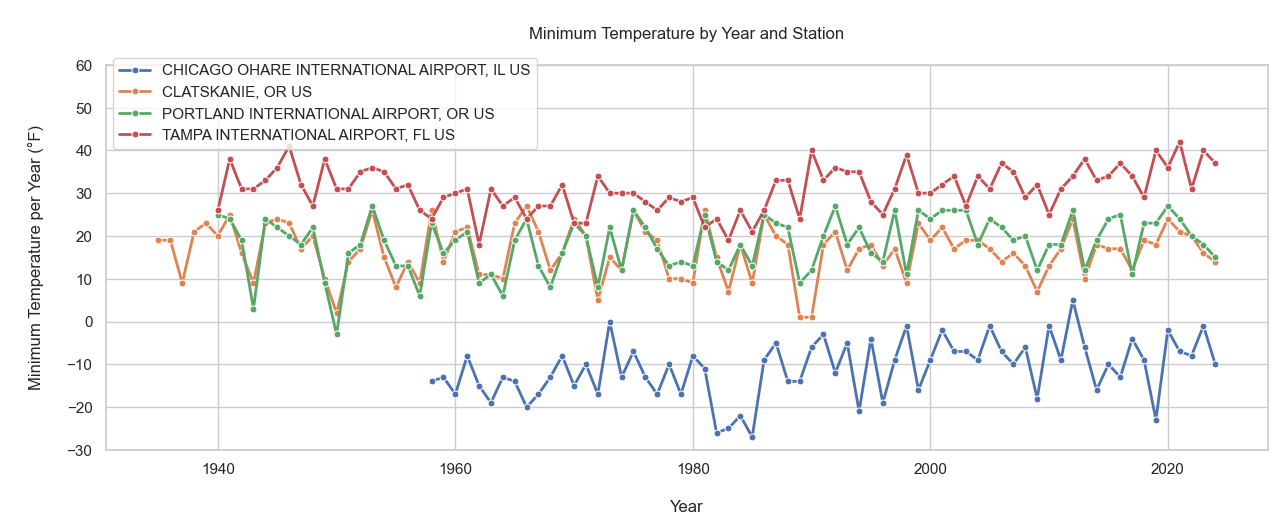

In [13]:
p_yearly_tmin, tmin = functions.tmin_annual_plot(df)

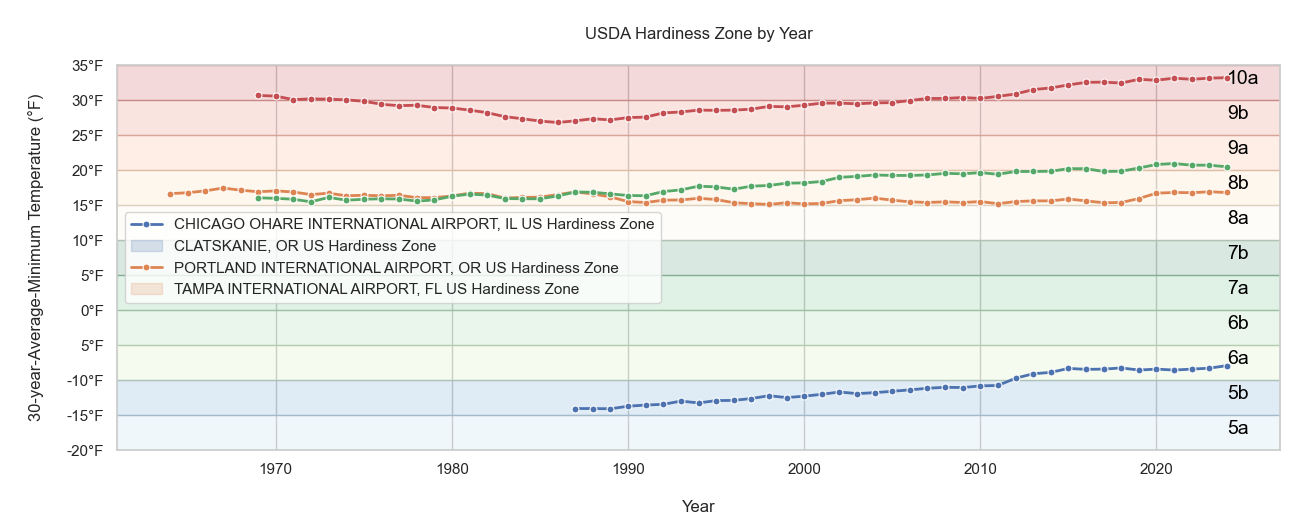

In [14]:
functions.usda_plant_hardiness_zone(tmin, legend_location='center left')

## The Ideal Temperature
* A TMAX comparison among locations

In [15]:
# Get Daily Maximum Temperature data
df1 = pd.read_csv('../data/temperature/temperature_chicago_ord.csv')
df1 = df1.assign(year = pd.to_datetime(df1['DATE']).dt.year)
assert len(df1.STATION.unique()) == 1

df2 = pd.read_csv('../data/temperature/temperature_tampa_tpa.csv')
df2 = df2.assign(year = pd.to_datetime(df2['DATE']).dt.year)
assert len(df2.STATION.unique()) == 1

df3 = pd.read_csv('../data/temperature/temperature_97218.csv')
df3 = df3.assign(year = pd.to_datetime(df3['DATE']).dt.year)
assert len(df3.STATION.unique()) == 1

df4 = pd.read_csv('../data/temperature/temperature_97016.csv')
df4 = df4[df4['STATION']=='USC00351643']
df4 = df4.assign(year = pd.to_datetime(df4['DATE']).dt.year)
assert len(df4.STATION.unique()) == 1

df = pd.concat([df1, df2, df3, df4])[['DATE', 'year', 'NAME', 'TMAX']]
df = df[df['year']>2020]

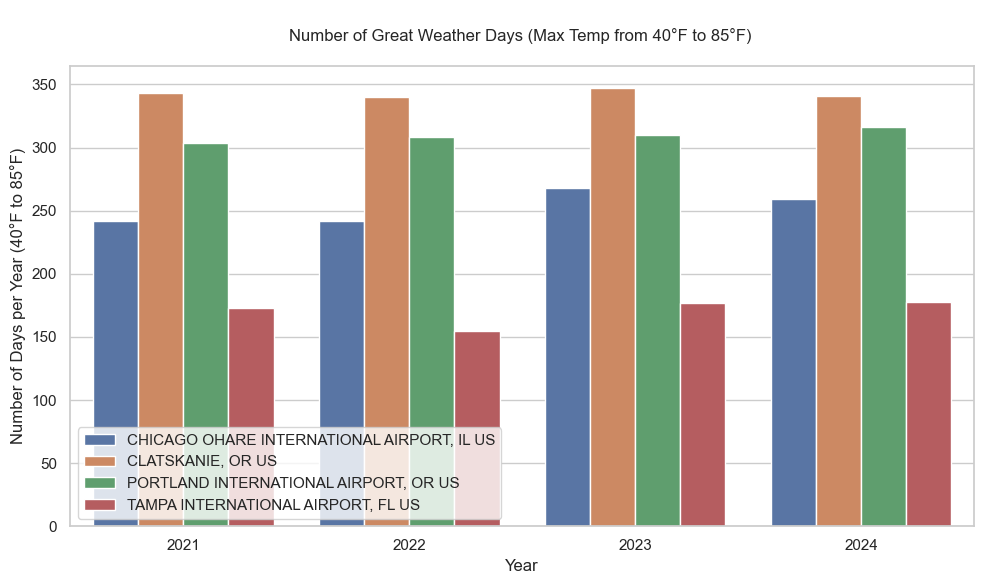

In [16]:
# okay_days
functions.ideal_tmax(df, 40, 85)

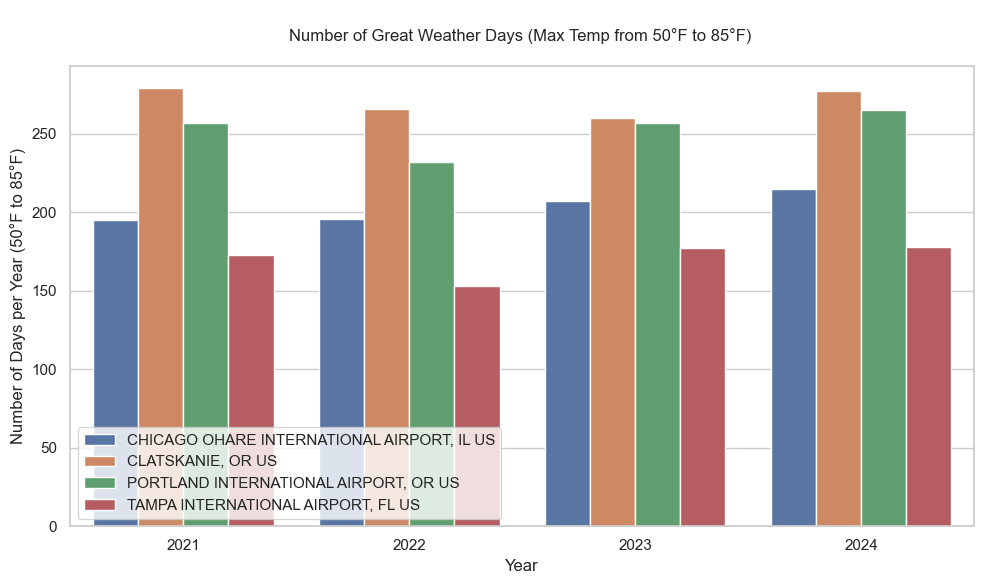

In [17]:
# fine_days
functions.ideal_tmax(df, 50, 85)

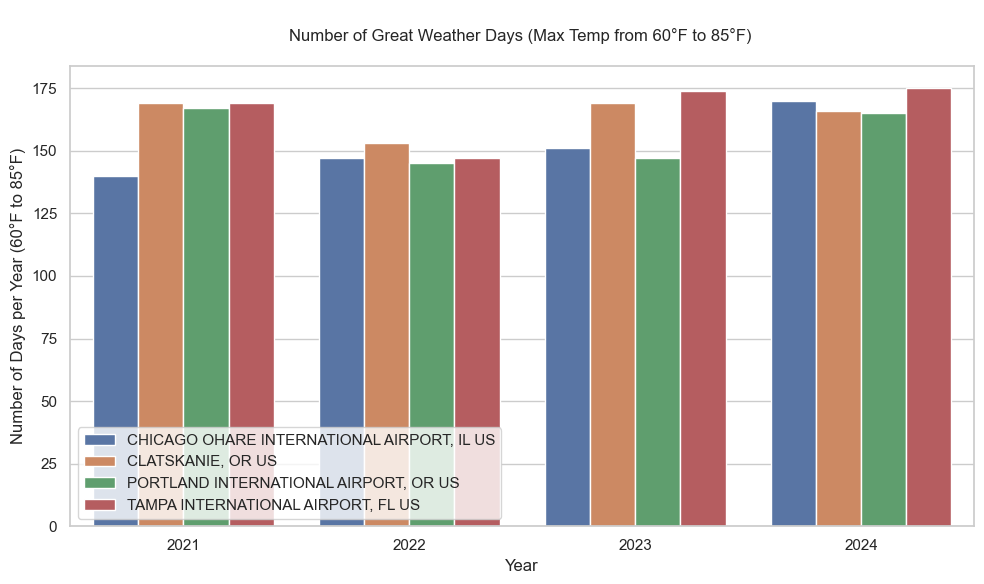

In [18]:
# great days
functions.ideal_tmax(df, 60, 85)